In [436]:
import pandas as pd     
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import gamma

In [437]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [438]:
"""DataFrame rework"""
data = pd.read_csv('C:/Users/theag/OneDrive/Dokumenter/15 - Maskin læring/assigment2/data_problem2.csv')

transposed_data = data.T

# resetter indexene for å lage en ny kolonne
df = transposed_data.reset_index()

# Gir kolonnene nye navn
df.columns = ['value', 'classes']

# viser de 5 første radene av datasettet
df.head()

,value,classes
0,8.903628615644770150e+00,1.0
1,9.946774341125676600e+00,1.0
2,1.445839234341517709e+01,1.0
3,9.664572458033614311e+00,1.0
4,1.441226967850837859e+01,1.0


In [439]:
"""Lager en liste for hver av colonnene"""

# setter alle verdiene i klasse 1 i egen liste
C_1 = df[df['classes'] == 1]
C_1 = C_1['value']
C_1 = C_1.astype(float)

# setter alle verdiene i klasse 0 i egen liste 
C_0 = df[df['classes'] == 0]
C_0 = C_0['value']
C_0 = list(C_0 .astype(float))

both_classes = np.array(df['classes'])

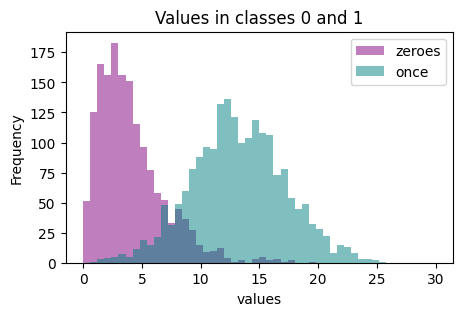

In [440]:
plt.figure(figsize=(5, 3))
plt.hist([C_0], bins = 50, range = (0,30), label=['zeroes'], color= ["purple"], linewidth=5, alpha = 0.5)
plt.hist([C_1], bins = 50, range= (0,30), label=['once'], color= ["teal"], linewidth=5, alpha = 0.5)
#plt.scatter(C_0, C_1, color = "dodgerblue", alpha = 0.5)

plt.xlabel('values')
plt.ylabel('Frequency')
plt.title('Values in classes 0 and 1')
plt.legend(loc='upper right')
plt.show()

In [441]:
# setter alle verdiene i klasse 1 i egen liste
C_1 = df.loc[df['classes'] == 1, :]
C_1 = np.array(C_1).astype(float)

# setter alle verdiene i klasse 0 i egen liste 
C_0 = df.loc[df['classes'] == 0, :]
C_0 = np.array(C_0).astype(float)

# Splitter liste i train og test: 
C1_test, C1_train = train_test_split(C_1, test_size=0.2, random_state=42, shuffle= True)
C0_test, C0_train = train_test_split(C_0, test_size = 0.2, random_state = 42, shuffle = True)


C1 = C1_train[:,1]
print(len(C1))
C0 = C0_train[:,1]
C0 = np.append(C0, np.zeros(80))
print(len(C0))
tot_real = np.concatenate((C0, C1), axis = 0)
print(len(tot_real))

#Sorterer ut kolonnen med tall
C0_train = C0_train[:,0]
C0_train = np.append(C0_train, np.zeros(80))
print(len(C0_train))
C1_train = C1_train[:,0]
print(len(C1_train))

tot_real_train = np.concatenate((C0_train, C1_train), axis = 0)
print(len(tot_real_train))

400
400
800
400
400
800


In [442]:
#Paramters for the functions

prior1 = len(C1_train)/len(C_1)
# Estimerer means og standard avvik ved å bruke meduan og IQR
# np.median - 
# np.percentile - 
means = np.array([np.mean(C1_train)])
stds = np.std(C1_train)
print(stds)
print(means)

#Parameters for clas 0: 
alpha = np.array([((np.mean(C0_train))**2) / (np.percentile(C0_train, 75) - np.percentile(C0_train, 25))]) 
#                    (np.median(C1_train)**2) / (np.percentile(C1_train, 75) - np.percentile(C1_train, 25))])
print(alpha)
beta = np.array([np.mean(C0_train) / (np.percentile(C0_train, 75) - np.percentile(C0_train, 25))])#(1/(len(C0_train)*alpha))*sum(C0_train)
print(beta)

prior = len(C0_train)/len(C_0)

4.06556318303652
[13.35879939]
[2.79231989]
[0.84891242]


In [443]:
def gamma_fordeling(C0_train, C1_train, alphas, betas, prior, prior1):

    #calculate the likelihoods for each class
    likelihoods_0 = gamma.pdf(C0_train[:, np.newaxis], a = alphas, scale = betas)
    likelihoods_1 = gamma.pdf(C1_train[:, np.newaxis], a = alphas, scale = betas)

    #calculate the posterior probabilities for each class
    posterior_probabilities_0 = likelihoods_0 * prior
    posterior_probabilities_1 = likelihoods_1 * prior1

    posterior_probabilities = np.concatenate((posterior_probabilities_0, posterior_probabilities_1), axis = 1)
    return posterior_probabilities

gamma_pred = gamma_fordeling(C0_train, C1_train, alpha, beta, prior, prior1)
gamma_pred = gamma_pred.T
print(gamma_pred)

[[5.27804626e-02 5.74931345e-02 3.07246614e-02 2.92242103e-04
  8.17843900e-02 4.58895931e-03 1.66834098e-03 7.03929599e-02
  8.09653493e-02 6.93461839e-03 2.14663832e-03 7.04617464e-08
  7.27996724e-02 8.37643149e-02 6.01767968e-03 6.56117007e-02
  2.89187236e-03 3.21928941e-02 2.06897264e-02 5.20295323e-02
  3.59652574e-02 6.80564969e-02 4.40484442e-02 7.52049530e-02
  4.88119098e-02 8.37960341e-02 7.36927904e-02 3.91917259e-04
  2.55993049e-03 8.25649888e-02 7.00032747e-02 5.40975117e-03
  2.00437549e-02 1.76924015e-07 6.74553344e-04 1.06841462e-02
  6.25030262e-02 1.28370722e-02 4.42307684e-08 7.09182110e-02
  4.33055049e-02 1.32042502e-02 7.23753007e-03 4.12151354e-02
  7.20059805e-02 1.96138177e-02 1.28437590e-04 5.95583593e-04
  5.76601387e-04 4.56631822e-07 5.45816207e-02 3.47258658e-02
  6.37765340e-02 1.39870123e-02 3.77670699e-02 7.97416350e-02
  5.26238164e-02 2.68954330e-02 7.22222689e-02 1.86719132e-02
  8.35019781e-02 5.43075354e-02 2.63432087e-03 3.09545250e-04
  3.8737

In [444]:
def normal_fordeling(class_1, class_0, means, stds, prior_1):
    # Calculate the likelihoods for each class
    likelihoods_1 = norm.pdf(class_1[:, np.newaxis], loc=means, scale=stds)
    likelihoods_0 = norm.pdf(class_0[:, np.newaxis], loc=means, scale=stds)
    # Calculate the posterior probabilities for each class
    posterior_probabilities_1 = (likelihoods_1 * prior_1)
    posterior_probabilities_0 = (likelihoods_0 * prior)

    posterior_probabilities = np.concatenate((posterior_probabilities_0, posterior_probabilities_1), axis = 1)

    return posterior_probabilities_0, posterior_probabilities_1

gausian_0, gausian_1 = normal_fordeling(C1_train, C0_train, means, stds, prior1)
gausian = np.concatenate((gausian_0, gausian_1), axis = 1).T
print(gausian)

[[8.91272909e-04 8.05633975e-04 1.49620165e-03 1.39384494e-02
  2.98022049e-04 4.98397237e-03 7.82997623e-03 6.04747967e-04
  2.89057986e-04 4.02111452e-03 7.05954782e-03 1.61514189e-02
  5.69982926e-04 3.44871039e-04 4.33850023e-03 2.17203399e-04
  6.19981763e-03 1.43865214e-03 2.03172187e-03 9.05801352e-04
  1.30647377e-03 6.38824473e-04 1.07962968e-03 5.35040804e-04
  9.71288198e-04 3.49259379e-04 5.57067852e-04 1.28493835e-02
  6.54466327e-03 4.09335005e-04 6.10397814e-04 4.58602822e-03
  2.07860305e-03 1.91647151e-02 1.08751414e-02 3.13950801e-03
  7.23127541e-04 2.80342469e-03 1.45683539e-02 5.97147042e-04
  1.09797330e-03 1.33712485e-04 3.92817710e-03 1.15201264e-03
  2.37688493e-04 2.11100045e-03 1.69675021e-02 1.13208400e-02
  1.14375840e-02 2.18247608e-02 8.57469028e-04 1.34764594e-03
  7.03247918e-04 2.65400087e-03 1.25006907e-03 4.64849790e-04
  8.94281660e-04 1.66666384e-03 2.38511188e-04 2.18559428e-03
  3.79836861e-04 1.91473984e-04 6.46277338e-03 1.37244549e-02
  1.2212

In [445]:
def bayes_classification(gama, gausian):
    post_prob = np.where(gausian > gama, 1, 0)
    post_prob = np.concatenate(post_prob, axis = 0)
    return post_prob

tot_probability = bayes_classification(gamma_pred, gausian)
tot_probability = tot_probability.T
print(tot_probability)

[0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 

In [446]:
tot_probability = np.array(tot_probability)
print(len(tot_probability))

accuracy = accuracy_score(tot_real, tot_probability)
print(accuracy)

800
0.80625


In [447]:
miscalculations = 1 - accuracy
print(f'miscalculation, {miscalculations:.2f}')

miscalculation, 0.19


In [448]:
"""Confusion matrix"""
confusion_matrix = confusion_matrix(tot_real, tot_probability)      
print(confusion_matrix)


[[258 142]
 [ 13 387]]


In [449]:
#calculating which of the predicted values that is not equal to the real one. 

missclassified_idx = np.where(tot_probability != tot_real)[0]
correctly_classified_idx = np.where(tot_probability == tot_real)[0]

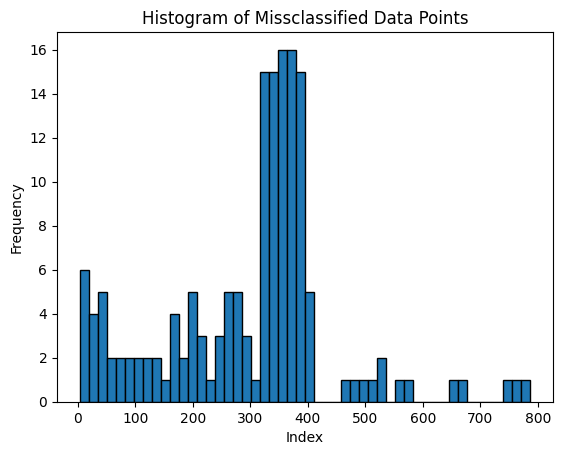

In [452]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(missclassified_idx, bins=50, edgecolor='black')
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.title('Histogram of Missclassified Data Points')
plt.show()

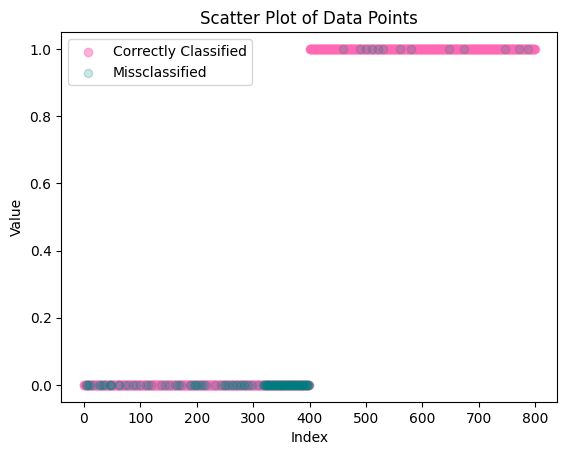

In [451]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(range(len(tot_real)), tot_real, c='hotpink', label='Correctly Classified', alpha= 0.5)
plt.scatter(missclassified_idx, tot_real[missclassified_idx], c='teal', label='Missclassified', alpha= 0.2)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scatter Plot of Data Points')
plt.legend()
plt.show()